In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize


In [8]:
weoemissions = pd.read_csv(
    r'C:\Users\Rosemary Akamagwuna\Desktop\Artificial Intelligence\WORLD ENERGY OUTLOOK 2021\DATA SETS\WEO2021_Free_Data_World.csv')
#print(weoemissions.head())


In [9]:
#weoemissions.isna().any()

In [10]:
#weoemissions.info()

In [11]:
#weoemissions.loc[:,['Flow']]

In [12]:
e_demand = weoemissions[(weoemissions['Flow'] == 'Total primary energy demand') & (weoemissions['Category']=='Energy')]
energy_demand = e_demand.iloc[:, [1, 3, 4, 5, 7, 8]]
#print(energy_demand.head())

Dummy Project - Analyzing the several scenarios for total energy demand


<AxesSubplot:title={'center':'World Total Enegy Demand - NZE '}, xlabel='Year', ylabel='EJ'>

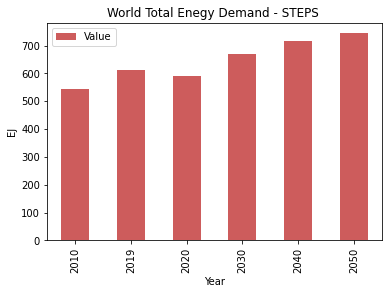

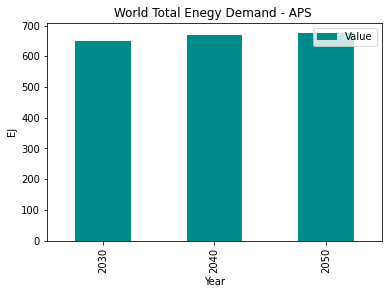

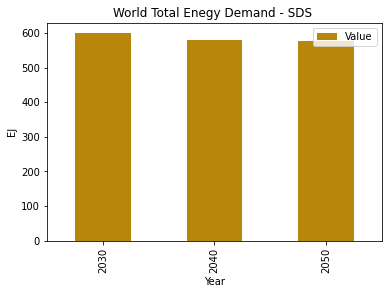

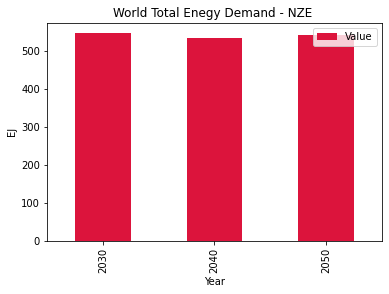

In [13]:
T_STEPS = energy_demand[(energy_demand['Scenario'] == 'Stated Policies Scenario') & (energy_demand['Product'] == 'Total')]
T_APS = energy_demand[(energy_demand['Scenario'] == 'Announced Pledges Scenario') & (energy_demand['Product'] == 'Total')]
T_SDS = energy_demand[(energy_demand['Scenario'] == 'Sustainable Development Scenario') & (energy_demand['Product'] == 'Total')]
T_NZE = energy_demand[(energy_demand['Scenario'] == 'Net Zero Emissions by 2050 Scenario') & (
    energy_demand['Product'] == 'Total')]
#print(T_STEPS)
#colors = ['r','g','b','y']
#for i in range(4):
    #T_STEPS.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - STEPS ',xlabel='Year', ylabel='EJ', color=colors[i])

T_STEPS.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - STEPS ',
             xlabel='Year', ylabel='EJ', color='indianred')
T_APS.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - APS ',
             xlabel='Year', ylabel='EJ', color='darkcyan')
T_SDS.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - SDS ',
             xlabel='Year', ylabel='EJ', color='darkgoldenrod')

T_NZE.plot(x='Year', y='Value', kind='bar', title='World Total Enegy Demand - NZE ',
             xlabel='Year', ylabel='EJ', color='crimson')



Global Energy Demand Mix for 2030, 2040 and 2050 - Project 1 

C:\Users\ROSEMA~1\AppData\Local\Temp/ipykernel_5480/2863946085.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(a,rotation=15)


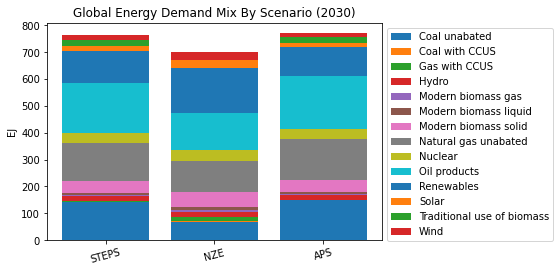

In [14]:
#PHASE ONE- This part of the project involves analyzing the STEPS, NZE and APS scenarios for the global energy demand mix for year 2030.
#STEPS
# 1. Defining the relevant rows and columns from the dataset
ep_demand = weoemissions[(weoemissions['Flow'] == 'Total primary energy demand') & (
    weoemissions['Category'] == 'Energy')]
energydemand_byp = ep_demand.iloc[:, [1, 3, 4, 5, 7, 8]]

# 2. confirming that there are no negative values in this dataset
energydemand_byp['Value'].value_counts().sum()
neg= energydemand_byp['Value']< 0
neg.sum()

# 3. Extracting data by year and scenarios for all product categories except "total"


energyyearScenes2030 = energydemand_byp[(energydemand_byp['Year'] == 2030) & (energydemand_byp['Product'] != 'Total') & (energydemand_byp['Scenario'].isin(['Stated Policies Scenario','Announced Pledges Scenario','Net Zero Emissions by 2050 Scenario']))]

# 4. the need to figure out how to manipulate the data to make every product a column and the scenarios remain the index, to facilitate plotting the stacked bar chart. Pivot tables came to the rescue!

plt2030demand = energyyearScenes2030.pivot_table('Value',['Scenario'],'Product')


# 5. Sort scenario in descending order
plt2030demandsorted = plt2030demand.sort_index(level=['Scenario'],ascending=False)

# 6. Rename scenarios with acronyms
plt2020demandsorted_new = plt2030demandsorted.rename(
    index={'Stated Policies Scenario': 'STEPS', 'Announced Pledges Scenario': 'APS', 'Net Zero Emissions by 2050 Scenario':'NZE'})
#print(plt2020demandsorted_new)

# 7. time to plot!
# Added a function to encourage reusability
def plot_bars(axes,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,ylabel):
    axes.bar(a,b, label='Coal unabated')
    axes.bar(a,c, bottom = b, label='Coal with CCUS')
    axes.bar(a,d, bottom = b + c, label= 'Gas with CCUS')
    axes.bar(a,e, bottom = b + c + d, label='Hydro')
    axes.bar(a,f, bottom = b + c + d + e, label = 'Modern biomass gas')
    axes.bar(a,g, bottom = b + c + d + e + f, label = 'Modern biomass liquid')
    axes.bar(a, h, bottom=b + c + d + e + f + g, label='Modern biomass solid')
    axes.bar(a, i, bottom=b + c + d + e + f +
             g + h, label='Natural gas unabated')
    axes.bar(a,j, bottom = b + c + d + e + f + g + h + i, label='Nuclear')
    axes.bar(a, k, bottom=b + c + d + e + f +
             g + h + i + j, label='Oil products')
    axes.bar(a, l, bottom=b + c + d + e + f +
             g + h + i + j + k, label='Renewables')
    axes.bar(a,m, bottom = b + c + d + e + f + g + h + i + j + k + l, label = 'Solar')
    axes.bar(a, n, bottom = b + c + d + e + f + g + h + i + j + k + l + m, label='Traditional use of biomass')
    axes.bar(a, o, bottom=b + c + d + e + f + g + h + i + j + k + l + m + n, label = 'Wind')
    axes.set_xticklabels(a,rotation=15)
    axes.set_ylabel(ylabel)

#Calling the function
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (7, 9) #to adjust the size of the plot
plot_bars(ax, plt2020demandsorted_new.index,plt2030demand['Coal unabated'],
          plt2030demand['Coal with CCUS'], plt2030demand['Gas with CCUS'], plt2030demand['Hydro'], plt2030demand['Modern biomass gas'], plt2030demand['Modern biomass liquid'], plt2030demand['Modern biomass solid'], plt2030demand['Natural gas unabated'], plt2030demand['Nuclear'], plt2030demand['Oil products'], plt2030demand['Renewables'], plt2030demand['Solar'],plt2030demand['Traditional use of biomass'],plt2030demand['Wind'],'EJ')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('Global Energy Demand Mix By Scenario (2030)')
plt.show()



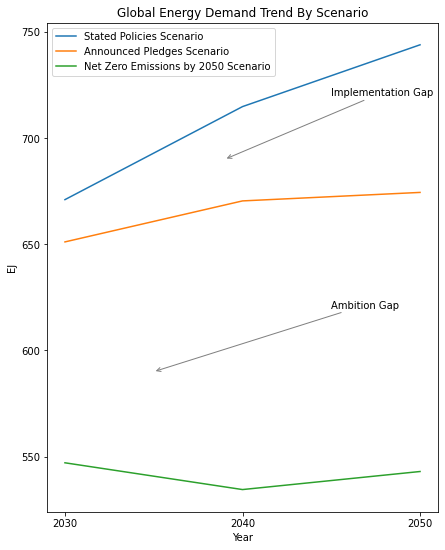

In [15]:
#PHASE TWO - This part of the project involves comparing the different scenarios of energy demand and assessing the ambition and implementation gaps
# 1. subsetting to compare energy demand by year and scenario
energyScenesdecades = energydemand_byp[(energydemand_byp['Year'].isin([2030, 2040, 2050])) & (
    energydemand_byp['Product'] == 'Total') & (energydemand_byp['Scenario'] != 'Sustainable Development Scenario')].set_index('Year')
#print(energyScenesdecades)
# 2. code for the line plot comparing scenarios by energy demand
scenario_set = set(energyScenesdecades['Scenario'])

plt.figure()
for Scenario in scenario_set:
    selected_data = energyScenesdecades.loc[energyScenesdecades['Scenario'] == Scenario]
    plt.plot(selected_data.index, selected_data['Value'], label=Scenario)
plt.title('Global Energy Demand Trend By Scenario')
plt.xlabel('Year')
plt.ylabel('EJ')
plt.gca().set_xticks(selected_data.index.unique())
plt.annotate('Implementation Gap', xy=(2039,690), xytext=(2045, 720), 
            arrowprops={'arrowstyle':'->','color':'gray'})
plt.annotate('Ambition Gap', xy=(2035, 590), xytext=(2045, 620),
             arrowprops={'arrowstyle': '->', 'color': 'gray'})
#plt.locator_params(integer=True)
plt.legend()
plt.show()
